# GRF - examples 3D

Generate gaussian random fields (GRF) following a method based on (block) circulant embedding of the covariance matrix and Fast Fourier Transform (FFT) (to compute discrete Fourier Transform): functions `geone.grf.grf<d>D` and `geone.grf.krige<d>D`.

### References
- C. R. Dietrich and G. N. Newsam. A fast and exact method for multidimensional gaussian stochastic simulations. Water Resour. Res., 29(8):2861-2869, 1993, [doi:10.1029/93WR01070](https://dx.doi.org/10.1029/93WR01070)
- A. T. A. Wood and G. Chan. Simulation of stationary gaussian processes in [0,1]^d. J. Comput. Graph. Stat., 3(4):409-432, 1994, url: http://www.jstor.org/stable/1390903.
- J. W. Cooley and J. W. Tukey. An algorithm for machine calculation of complex fourier series. Math. Comput., 19(90):297-301, 1965, [doi:10.2307/2003354](https://dx.doi.org/10.2307/2003354)

## Import what is required

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv

# import package 'geone'
import geone as gn

In [2]:
# Show version of python and version of geone
import sys 
print(sys.version_info)
print('geone version: ' + gn.__version__)

sys.version_info(major=3, minor=10, micro=9, releaselevel='final', serial=0)
geone version: 1.1.12


In [3]:
pv.set_jupyter_backend('static') # to get static plots within the jupyter notebook

## Define a covariance model in 3D: class `geone.covModel.CovModel3D`

A covariance model is defined by its elementary contributions given as a list of 2-tuples, 
whose the first component is the type given by a string and the second component is a dictionary used to pass the required parameters.

    Type             Parameters (dict)
    ----             ----------
    'nugget'         'w' (float) weight
    'spherical'      'w' (float) weight, 'r' (sequence of two floats) ranges
    'exponential'    'w' (float) weight, 'r' (sequence of two floats) ranges
    'gaussian'       'w' (float) weight, 'r' (sequence of two floats) ranges
    'linear'         'w' (float) weight, 'r' (sequence of two floats) ranges
    'cubic'          'w' (float) weight, 'r' (sequence of two floats) ranges
    'sinus_cardinal' 'w' (float) weight, 'r' (sequence of two floats) ranges
    'gamma'          'w' (float) weight, 'r' (sequence of two floats) ranges, 's' (float) power
    'power'          'w' (float) weight, 'r' (sequence of two floats) scales, 's' (float) power
    'exponential_generalized'
                     'w' (float) weight, 'r' (sequence of two floats) ranges, 's' (float) power
    'matern'         'w' (float) weight, 'r' (sequence of two floats) scales, 'nu' (float)

Azimuth (`alpha`), dip (`beta`) and plunge (`gamma`) angles can be specified in degrees: the coordinates system Ox'''y''''z''', supporting the axes of the model (ranges), is obtained from the original coordinates system Oxyz as follows:
- Oxyz       -> rotation of angle -alpha around Oz   -> Ox'y'z'
- Ox'y'z'    -> rotation of angle -beta  around Ox'  -> Ox''y''z''
- Ox''y''z'' -> rotation of angle -gamma around Oy'' -> Ox'''y'''z'''
    
See class `geone.covModel.CovModel3D` for more details.

In [4]:
cov_model = gn.covModel.CovModel3D(elem=[
    ('gaussian', {'w':8.5, 'r':[40, 20, 10]}), # elementary contribution
    ('nugget', {'w':0.5})                      # elementary contribution
    ], alpha=-30, beta=-40, gamma=20, name='model-3D example')

In [5]:
cov_model

*** CovModel3D object ***
name = 'model-3D example'
number of elementary contribution(s): 2
elementary contribution 0
    type: gaussian
    parameters:
        w = 8.5
        r = [40, 20, 10]
elementary contribution 1
    type: nugget
    parameters:
        w = 0.5
angles: alpha = -30, beta = -40, gamma = 20 (in degrees)
    i.e.: the system Ox'''y''''z''', supporting the axes of the model (ranges),
    is obtained from the system Oxyz as follows:
        Oxyz      -- rotation of angle -alpha around Oz  --> Ox'y'z'
        Ox'y'z'   -- rotation of angle -beta  around Ox' --> Ox''y''z''
        Ox''y''z''-- rotation of angle -gamma around Oy''--> Ox'''y'''z'''
*****

### Plot the covariance / variogram function of the model

Plot the covariance function by using the method `plot_model3d_volume` of the class for a 3D volume representation (based on `pyvista` module). The main axes are shown in red (x'''), green (y''') and blue (z''''), or in custom colors passing the keyword arguments `color0` (x'''),  `color1` (y'''), and `color2` (z''').

../src/intel/isl/isl.c:2216: FINISHME: ../src/intel/isl/isl.c:isl_surf_supports_ccs: CCS for 3D textures is disabled, but a workaround is available.


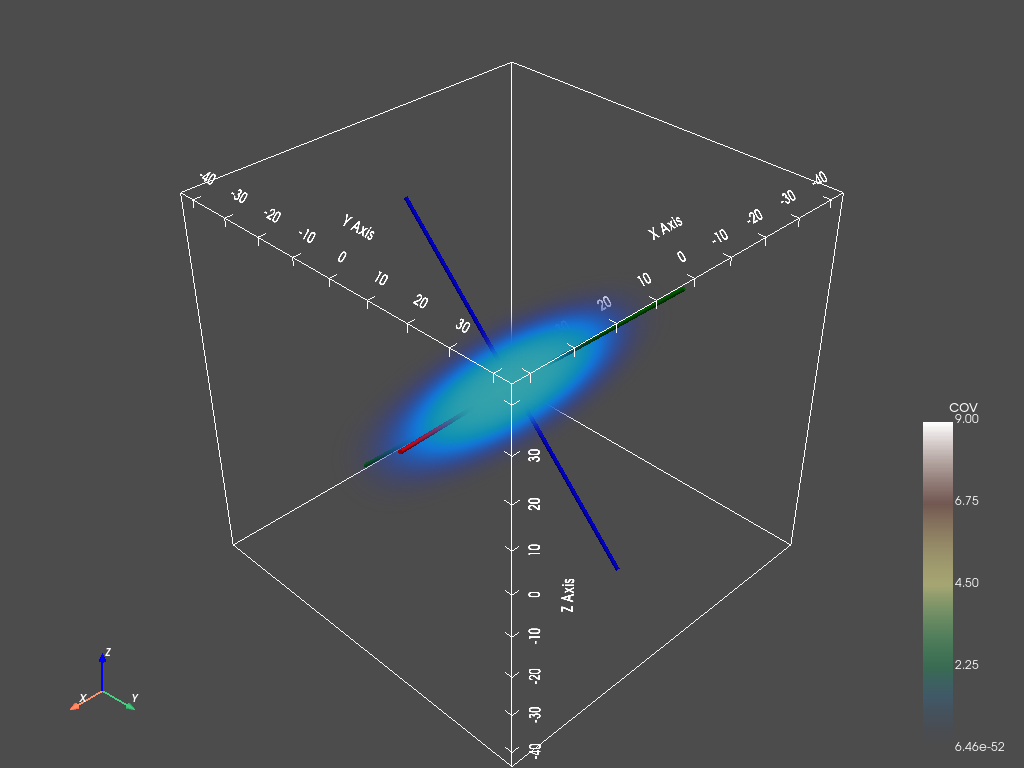

In [6]:
cov_model.plot_model3d_volume()

For a view in an intaractive figure (pop-up window), uncomment the lines in the following cell and run it.

In [7]:
%%script false --no-raise-error # skip this cell! (comment this line to run the cell)

pp = pv.Plotter(notebook=False) # open a plotter and specifying 'notebook=False'
cov_model.plot_model3d_volume(plotter=pp)
pp.show() # after closing the pop-up window, the position of the camera is retrieved in output.

The method `plot_model3d_slice` of the class gives a 3D representations with slices orthogonal to the main axes and going through the origin (by default). 

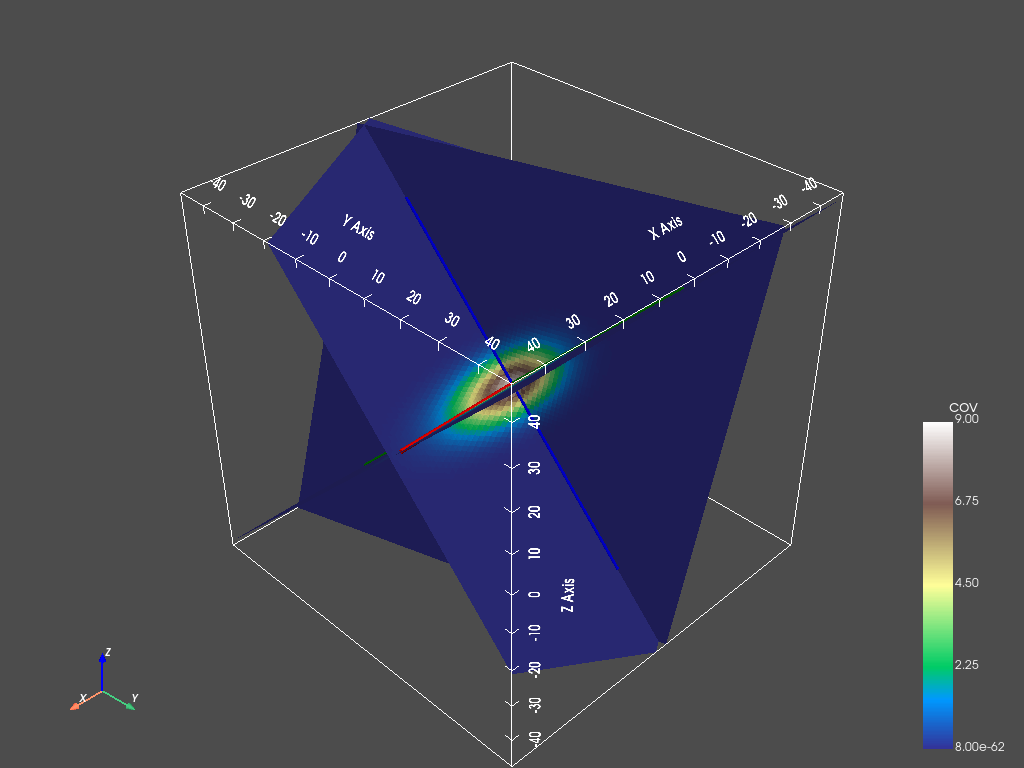

In [8]:
cov_model.plot_model3d_slice()

In [9]:
%%script false --no-raise-error # skip this cell! (comment this line to run the cell)

# Interactive figure
pp = pv.Plotter(notebook=False) # open a plotter and specifying 'notebook=False'
cov_model.plot_model3d_slice(plotter=pp)
pp.show() # after closing the pop-up window, the position of the camera is retrieved in output.

For plotting slices orthogonal to each axis of the system Oxyz:

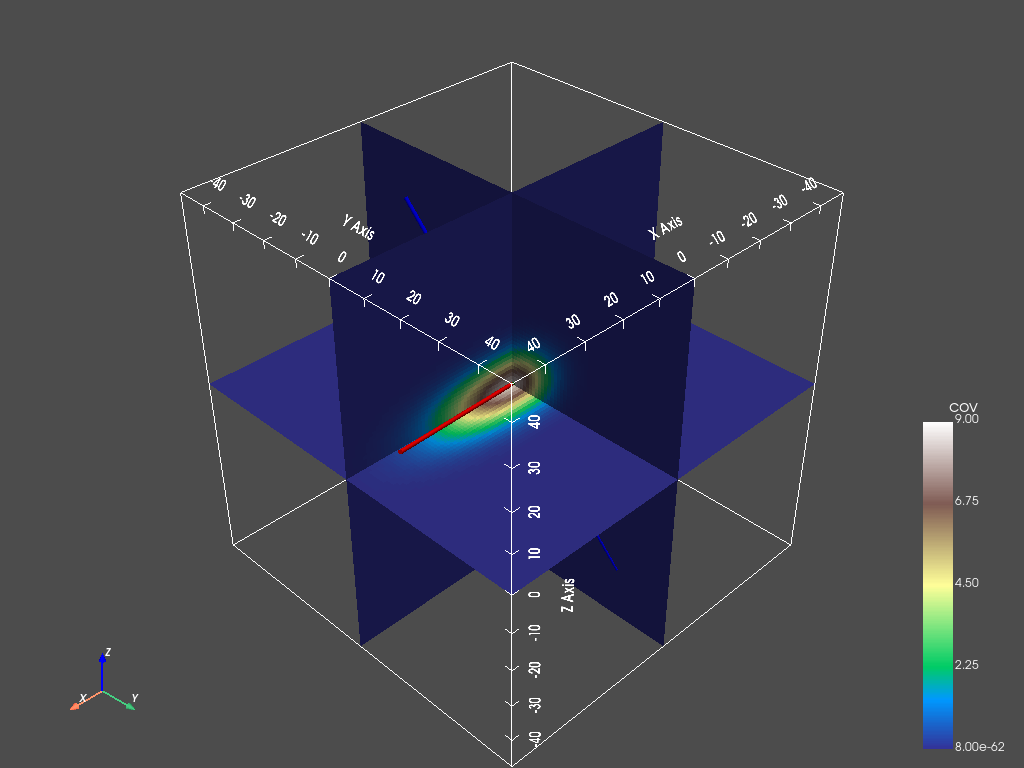

In [10]:
cov_model.plot_model3d_slice(slice_normal_x=0, slice_normal_y=0, slice_normal_z=0, slice_normal_custom=None)

In [11]:
%%script false --no-raise-error # skip this cell! (comment this line to run the cell)

# Interactive figure
pp = pv.Plotter(notebook=False) # open a plotter and specifying 'notebook=False'
cov_model.plot_model3d_slice(plotter=pp, 
                             slice_normal_x=0, slice_normal_y=0, slice_normal_z=0, slice_normal_custom=None)
pp.show() # after closing the pop-up window, the position of the camera is retrieved in output.

Plot the covariance function by using the method `plot_model_curves` of the class for plotting the function along each main axis (x''', y''', and z'''). Again, the default colors can be changed by passing the keyword arguments `color0`,  `color1`, and `color2`.

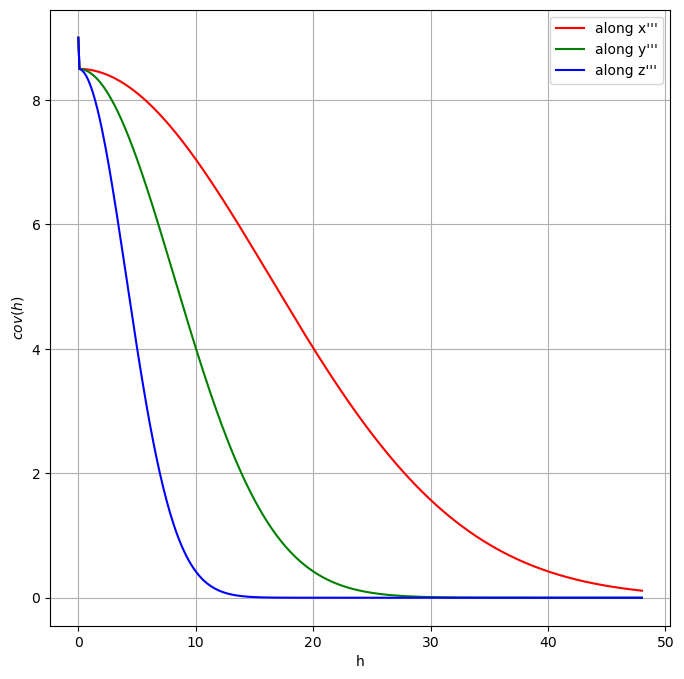

In [12]:
plt.figure(figsize=(8,8))
cov_model.plot_model_curves()
plt.show()

Plotting the variogram function: as above, but passing the keyword argument `vario=True` to the method `plot_model3d_volume` or `plot_model3d_sclice` or `plot_model_curves`.

The main axes (x''', y''' and z''') can be plotted using the method `plot_mrot`. Again, the default colors can be changed by passing the keyword arguments `color0`,  `color1`, and `color2`.

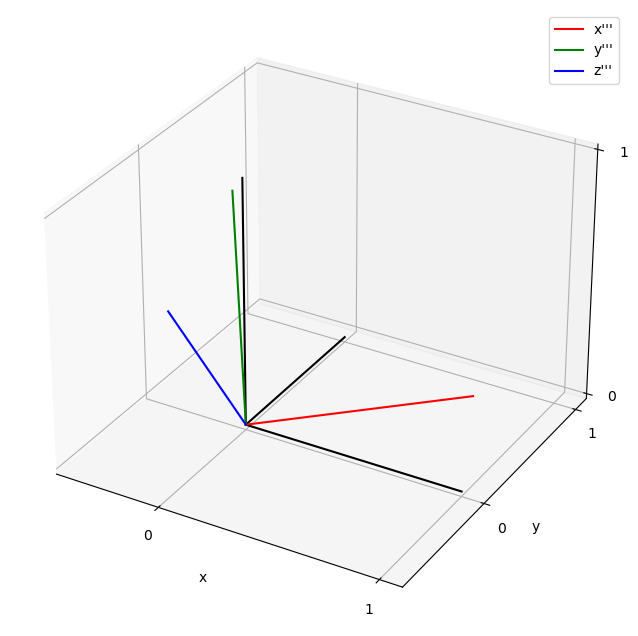

In [13]:
cov_model.plot_mrot(figsize=(8,8))

### Get the sill and ranges
Get the sill and the range along each axis in the coordinates system supporting the axes of the model.
- sill: sum of weight of every elementary contribution of the covariance model
- range: range max over all elementary contributions of the covariance model; for each elementary contribution the "effective" range is retrieved, i.e. the distance beyond which the covariance is zero or below 5% of the weight (this corresponds to the parameter 'r' for most of covariance types).

In [14]:
w = cov_model.sill() # scalar
r = cov_model.r123() # vector (1d-array) of length 3 ranges along x'''', y''', z'''
print("Sill = {}".format(w))
print("Range along x''' = {}, along y''' = {}, along z''' = {}".format(r[0], r[1], r[2]))

Sill = 9.0
Range along x''' = 40.0, along y''' = 20.0, along z''' = 10.0


Get the maximal range along each axis of the original system Oxyz.

In [15]:
rxyz = cov_model.rxyz()  # vector (1d-array) of length 2: "max ranges" along x, y, z
print("Max. range along x = {}, along y = {}, along z = {}".format(rxyz[0], rxyz[1], rxyz[2]))

Max. range along x = 36.948833461834035, along y = 13.268278963378767, along z = 12.855752193730785


## GRFs - simulation and estimation in 3D
The following functions are used:
- `geone.grf.grf3D` for simulation 3D,
- `geone.grf.krige3D` for estimation 3D.

**Alternatives**

The function `geone.multiGaussian.multiGaussianRun` can be used as a wrapper; with keyword arguments  
- `mode='simulation', algo='fft'`: wrapper for `geone.grf.grf<d>D`,
- `mode='estimation', algo='fft'`: wrapper for `geone.grf.krige<d>D`,

where the dimension `<d>` is automatically detected. Note also that the function `geone.multiGaussian.multiGaussianRun` allows to choose the "format" of the output by the keyword argument `output_mode`:
- `output_mode='array'`: an numpy array is returned,
- `output_mode='img'`: an "image" (class `geone.img.Img`) is returned.

### Simulation of GRFs - 3D
Define the simulation grid.

In [16]:
nx, ny, nz = 85, 56, 34  # number of cells
dx, dy, dz = 1.0, 1.0, 1.0  # cell unit
ox, oy, oz = 0.0, 0.0, 0.0  # origin

dimension = [nx, ny, nz]
spacing = [dx, dy, dz]
origin = [ox, oy, oz]

### Remark
As the generation of GRFs is based on FFT, periodic fields are generated. Hence, an extended simulation grid is used and then cropped after the simulation. The extension should be large enough in order to avoid wrong correlations, i.e. correlations across opposite borders of the grid, or correlations between two nodes regarding both distances between them (with respect to the periodic grid).

An appropriate extension is automatically computed by the function `geone.grf.grf3D` based on the covariance model class passed as first argument. However, the minimal extension along each axis (x, y, and z) can be given explicitly with the keyword argument `extensionMin`.

Note that a covariance function can be passed as first argument (in the example below, the function `cov_model.func()` instead of the class `cov_model`). In this situation, an appropriate minimal extension can be computed by the function `extension_min` for each axis (i.e. `[geone.grf.extension_min(r, n, s) for r, n, s in zip(cov_model.rxyz(), (nx, ny, nz), (dx, dy, dz))]`), and then passed to the GRF simulator `geone.grf.grf3D` via the keyword argument `extensionMin`.

#### Notes
When passing the covariance model class as first argument, the extension is computed based on the ranges of the covariance. If the results show artefacts or unexpected features (this can happen when using Gaussian covariance model), one may try to fix the problem by increasing the extension. To do so, a factor (greather than one) can be specified via the keyword argument `rangeFactorForExtensionMin`: the ranges will be multiplied by this factor before computing the extension.

*Remark:* the keyword argument `verbose` allows to control what is displayed, `verbose=0`: minimal display, `verbose=1`: only error(s) (if any), `verbose=2` (default): error(s) and warning(s) encountered, `verbose=3`: error(s) and warning(s) encountered, and additional information.

### Unconditional simulations
Set the number of realizations, the seed and launch the (unconditional) simulations.

In [17]:
nreal = 200
np.random.seed(123)
sim3Da = gn.grf.grf3D(cov_model, dimension, spacing, origin, nreal=nreal)
# sim3Da = gn.grf.grf3D(cov_model, dimension, spacing, origin, nreal=nreal, verbose=3)

In [18]:
%%script false --no-raise-error # skip this cell! (comment this line to run the cell)

# Alternative:
nreal = 200
np.random.seed(123)
out = gn.multiGaussian.multiGaussianRun(cov_model, dimension, spacing, origin, 
                                        mode='simulation', algo='fft', output_mode='array',
                                        nreal=nreal)
# Same results:
np.all(out == sim3Da) # should be True

The result is a 4d array of size `nreal` by `nz` by `ny` by `nx`:

In [19]:
sim3Da.shape

(200, 34, 56, 85)

Fill an image (`geone.img.Img` class) with all realizations (for display, see below), and delete the array sim3Da.

In [20]:
im3a = gn.img.Img(nx, ny, nz, dx, dy, dz, ox, oy, oz, nv=nreal, val=sim3Da)
del(sim3Da)

Compute the mean and the standard deviation over the realizations (pixel-wise).

In [21]:
im3a_mean = gn.img.imageContStat(im3a, op='mean') # pixel-wise mean
im3a_std = gn.img.imageContStat(im3a, op='std')   # pixel-wise standard deviation
# # Or:
# sim3Da_mean = np.mean(sim3Da.reshape(nreal, -1), axis=0).reshape(nz, ny, nx)
# sim3Da_std = np.std(sim3Da.reshape(nreal, -1), axis=0).reshape(nz, ny, nx)
# # and then fill new image with results

Plot the first realizations, the mean, and the standard deviation (in an *interactive figure* or *inline*).

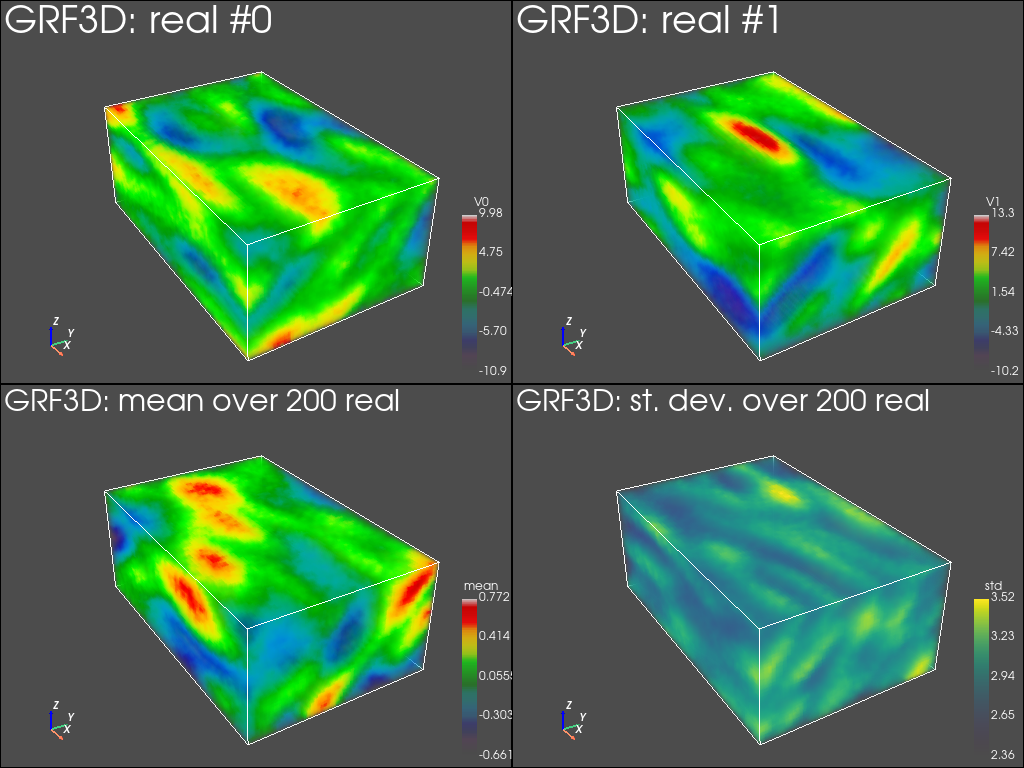

In [22]:
# Color settings
cmap = 'nipy_spectral'

# Plot "interactive in pop-up window" or "inline" (comment the undesired one) ...
# ... interactive (after closing the pop-up window, the position of the camera is retrieved in output)
#pp = pv.Plotter(shape=(2,2), notebook=False)
# ... inline
pp = pv.Plotter(shape=(2,2))

# 2 first reals
for i in (0, 1):
    pp.subplot(0, i)
    gn.imgplot3d.drawImage3D_volume(
        im3a, iv=i, 
        plotter=pp,
        cmap=cmap,
        text='GRF3D: real #{}'.format(i),
        scalar_bar_kwargs={'vertical':True, 'label_font_size':12})

# mean of all real
pp.subplot(1, 0)
gn.imgplot3d.drawImage3D_volume(
    im3a_mean, 
    plotter=pp,
    cmap=cmap,
    text='GRF3D: mean over {} real'.format(nreal),
    scalar_bar_kwargs={'vertical':True, 'label_font_size':12})

# standard deviation of all real
pp.subplot(1, 1)
gn.imgplot3d.drawImage3D_volume(
    im3a_std, 
    plotter=pp,
    cmap='viridis',
    text='GRF3D: st. dev. over {} real'.format(nreal),
    scalar_bar_kwargs={'vertical':True, 'label_font_size':12})

pp.link_views()

pp.show(cpos=(165, -100, 115)) # position of the camera can be specified

### Conditional simulations
Define hard data. Note that the conditioning values will be attached to the grid cells containing the corresponding conditioning locations.

In [23]:
x = np.array([[ 10.5,  20.5,  3.5], # 1st point
              [ 40.5,  10.5, 10.5], # 2nd point
              [ 30.5,  40.5, 20.5], # 3rd point
              [ 30.5,  30.5, 30.5]]) # 4th point
v = [ -3.,  2.,   5.,  -1.] # values

Launch the simulations and plot.

In [24]:
nreal = 200
np.random.seed(123)
sim3Db = gn.grf.grf3D(cov_model, dimension, spacing, origin, x=x, v=v, nreal=nreal)

# Fill image with result, and compute statistics
im3b = gn.img.Img(nx, ny, nz, dx, dy, dz, ox, oy, oz, nv=nreal, val=sim3Db)
del(sim3Db)
im3b_mean = gn.img.imageContStat(im3b, op='mean') # pixel-wise mean
im3b_std = gn.img.imageContStat(im3b, op='std')   # pixel-wise standard deviation

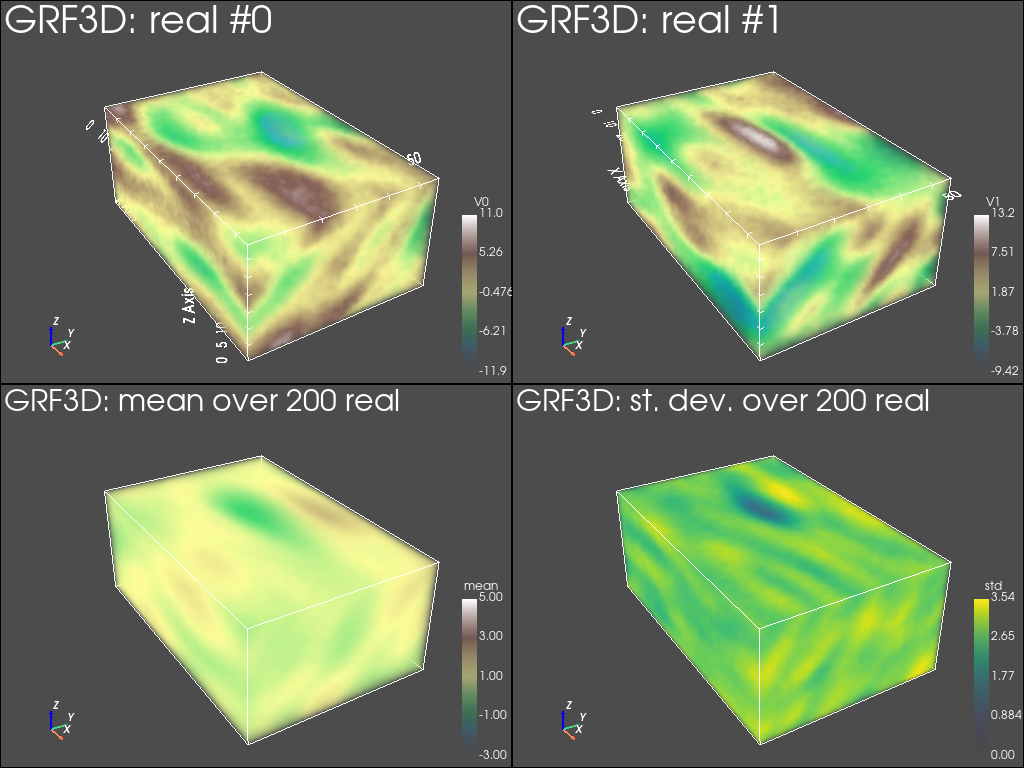

In [25]:
# Color settings
cmap = 'terrain'

# Plot "interactive in pop-up window" or "inline" (comment the undesired one) ...
# ... interactive (after closing the pop-up window, the position of the camera is retrieved in output)
#pp = pv.Plotter(shape=(2,2), notebook=False)
# ... inline
pp = pv.Plotter(shape=(2,2))

# 2 first reals
for i in (0, 1):
    pp.subplot(0, i)
    gn.imgplot3d.drawImage3D_volume(
        im3b, iv=i, 
        plotter=pp,
        show_bounds=True, # show axes and ticks around the 3D box
        cmap=cmap, 
        text='GRF3D: real #{}'.format(i),
        scalar_bar_kwargs={'vertical':True, 'label_font_size':12})

# mean of all real
pp.subplot(1, 0)
gn.imgplot3d.drawImage3D_volume(
    im3b_mean, 
    plotter=pp,
    cmap=cmap,
    text='GRF3D: mean over {} real'.format(nreal),
    scalar_bar_kwargs={'vertical':True, 'label_font_size':12})

# standard deviation of all real
pp.subplot(1, 1)
gn.imgplot3d.drawImage3D_volume(
    im3b_std, 
    plotter=pp,
    cmap='viridis',
    text='GRF3D: st. dev. over {} real'.format(nreal),
    scalar_bar_kwargs={'vertical':True, 'label_font_size':12})

pp.link_views()

pp.show(cpos=(165, -100, 115)) # position of the camera can be specified

Plot slices orthogonal to each axis x, y, z, ang going through the first data point, and plot the data points.

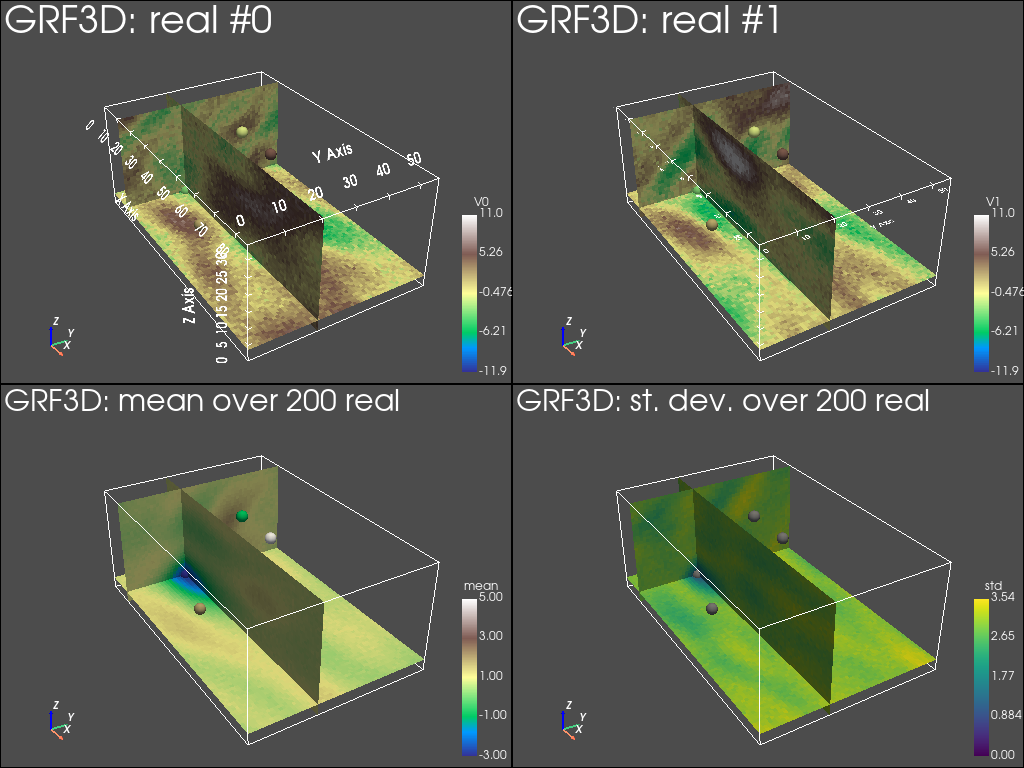

In [26]:
# Color settings
cmap = 'terrain'

cmin = np.min(im3b.vmin()[0:1]) # min value for real 0 and 1
cmax = np.max(im3b.vmax()[0:1]) # max value for real 0 and 1

cmin_mean = im3b_mean.vmin()[0] # min value for mean
cmax_mean = im3b_mean.vmax()[0] # max value for mean

# Get colors for conditioning data according to their value and color settings
data_points_col = gn.imgplot.get_colors_from_values(v, cmap=cmap, cmin=cmin, cmax=cmax) 
data_points_mean_col = gn.imgplot.get_colors_from_values(v, cmap=cmap, cmin=cmin_mean, cmax=cmax_mean) 

# Set points to be plotted
data_points = pv.PolyData(x)
data_points['colors'] = data_points_col

data_points_mean = pv.PolyData(x)
data_points_mean['colors'] = data_points_mean_col

# Plot "interactive in pop-up window" or "inline" (comment the undesired one) ...
# ... interactive (after closing the pop-up window, the position of the camera is retrieved in output)
#pp = pv.Plotter(shape=(2,2), notebook=False)
# ... inline
pp = pv.Plotter(shape=(2,2))

# 2 first reals
# data points to be added to 3D plot of real
for i in (0, 1):
    pp.subplot(0, i)
    gn.imgplot3d.drawImage3D_slice(
        im3b, iv=i, 
        plotter=pp,
        slice_normal_x=x[0,0],
        slice_normal_y=x[0,1],
        slice_normal_z=x[0,2],
        cmap=cmap, cmin=cmin, cmax=cmax, 
        show_bounds=True, # show axes and ticks around the 3D box
        text='GRF3D: real #{}'.format(i),
        scalar_bar_kwargs={'vertical':True, 'label_font_size':12})
    pp.add_mesh(data_points, rgb=True, point_size=12., render_points_as_spheres=True)

# mean of all real
pp.subplot(1, 0)
gn.imgplot3d.drawImage3D_slice(
    im3b_mean, 
    plotter=pp,
    slice_normal_x=x[0,0],
    slice_normal_y=x[0,1],
    slice_normal_z=x[0,2],
    cmap=cmap, cmin=cmin_mean, cmax=cmax_mean, 
    text='GRF3D: mean over {} real'.format(nreal),
    scalar_bar_kwargs={'vertical':True, 'label_font_size':12})
pp.add_mesh(data_points_mean, rgb=True, point_size=12., render_points_as_spheres=True)

# standard deviation of all real
pp.subplot(1, 1)
gn.imgplot3d.drawImage3D_slice(
    im3b_std, 
    plotter=pp,
    slice_normal_x=x[0,0],
    slice_normal_y=x[0,1],
    slice_normal_z=x[0,2],
    cmap='viridis', 
    text='GRF3D: st. dev. over {} real'.format(nreal),
    scalar_bar_kwargs={'vertical':True, 'label_font_size':12})
pp.add_mesh(data_points, color='gray', point_size=12., render_points_as_spheres=True)

pp.link_views()

pp.show(cpos=(165, -100, 115)) # position of the camera can be specified

### Kriging
Compute (simple) kriging estimates and standard deviation.

In [27]:
krig3Db, krig3Db_std = gn.grf.krige3D(cov_model, dimension, spacing, origin, x, v)

In [28]:
%%script false --no-raise-error # skip this cell! (comment this line to run the cell)

# Alternative:
np.random.seed(123)
out = gn.multiGaussian.multiGaussianRun(cov_model, dimension, spacing, origin, x, v,
                                        mode='estimation', algo='fft', output_mode='array')
# Same results:
np.all(out == np.array((krig3Db, krig3Db_std))) # should be True

Fill an image (Img class) with kriging estimates and standard deviation (for display, see below), and delete array krig3Db and krig3Db_std.

In [29]:
im3b_krig = gn.img.Img(nx, ny, nz, dx, dy, dz, ox, oy, oz, nv=2, val=np.array((krig3Db, krig3Db_std)))
del(krig3Db, krig3Db_std)

Plot the kriging estimates and standard deviation.

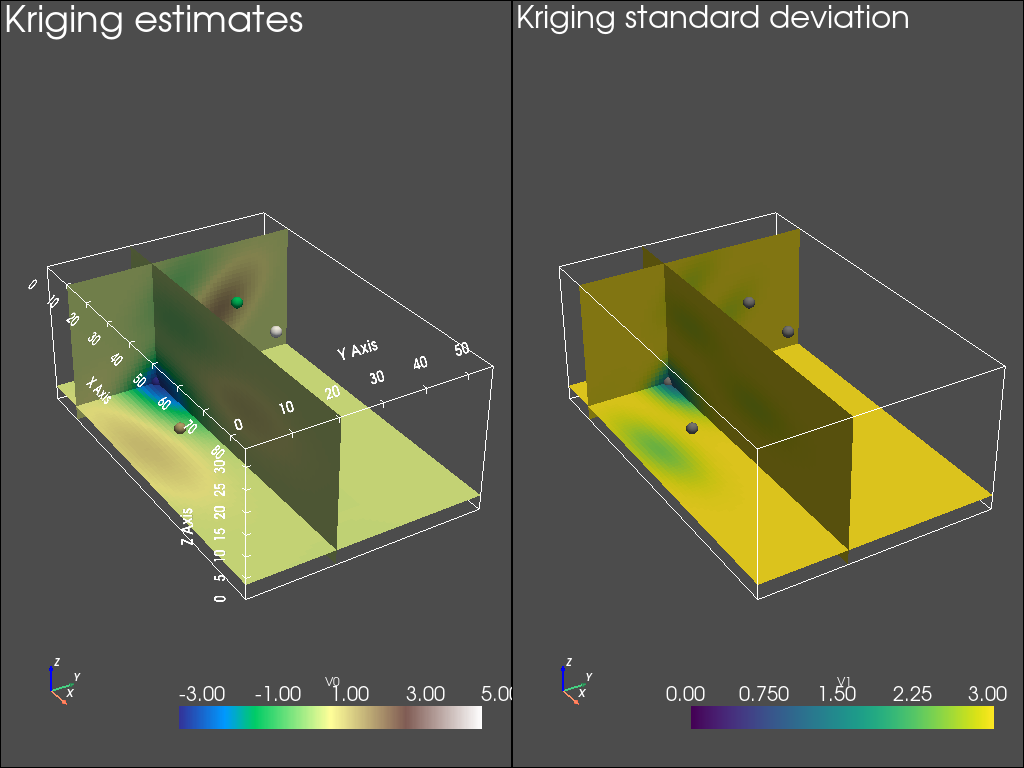

In [30]:
# Color settings
cmap = 'terrain'

cmin = im3b_krig.vmin()[0] # min value for krig. est.
cmax = im3b_krig.vmax()[0] # max value for krig. est.

# Get colors for conditioning data according to their value and color settings
data_points_krig_col = gn.imgplot.get_colors_from_values(v, cmap=cmap, cmin=cmin, cmax=cmax) 

# Set points to be plotted
data_points_krig = pv.PolyData(x)
data_points_krig['colors'] = data_points_krig_col

# Plot "interactive in pop-up window" or "inline" (comment the undesired one) ...
# ... interactive (after closing the pop-up window, the position of the camera is retrieved in output)
#pp = pv.Plotter(shape=(1,2), notebook=False)
# ... inline
pp = pv.Plotter(shape=(1,2))

# kriging estimates
pp.subplot(0, 0)
gn.imgplot3d.drawImage3D_slice(
    im3b_krig, iv=0, 
    plotter=pp,
    slice_normal_x=x[0,0],
    slice_normal_y=x[0,1],
    slice_normal_z=x[0,2],
    cmap=cmap, cmin=cmin, cmax=cmax, 
    show_bounds=True, # show axes and ticks around the 3D box
    text='Kriging estimates',
    scalar_bar_kwargs={'label_font_size':20})
pp.add_mesh(data_points_krig, rgb=True, point_size=12., render_points_as_spheres=True)


# kriging standard deviation
pp.subplot(0, 1)
gn.imgplot3d.drawImage3D_slice(
    im3b_krig, iv=1, 
    plotter=pp,
    slice_normal_x=x[0,0],
    slice_normal_y=x[0,1],
    slice_normal_z=x[0,2],
    cmap='viridis', 
    text='Kriging standard deviation',
    scalar_bar_kwargs={'label_font_size':20})
pp.add_mesh(data_points_krig, color='gray', point_size=12., render_points_as_spheres=True)

pp.link_views()

pp.show(cpos=(165, -100, 115)) # position of the camera can be specified

### Comparison of mean and standard deviation of all realizations with kriging results

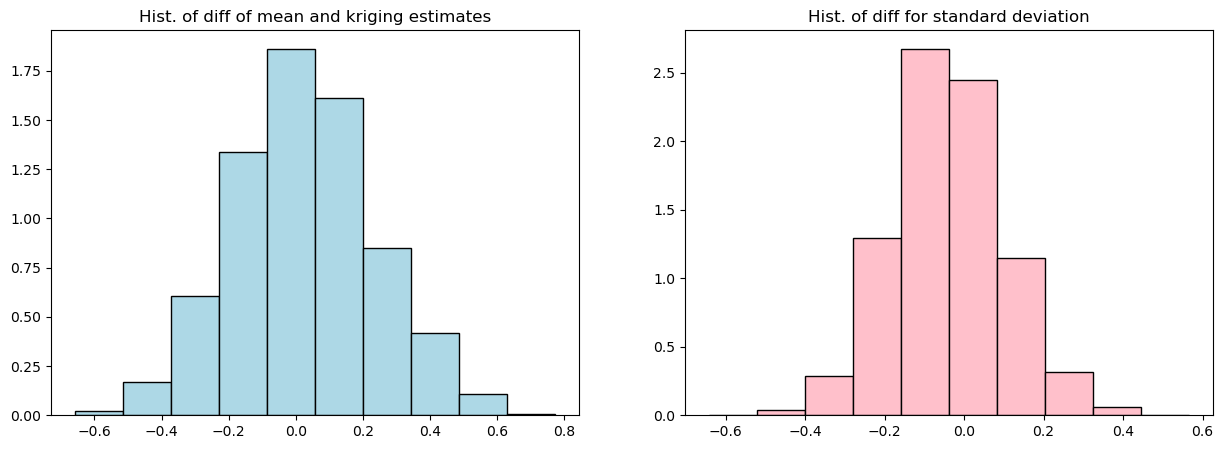

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

# Histogram of mean of all real - kriging estimates
plt.subplot(1, 2, 1)
plt.hist(im3b_mean.val.reshape(-1) - im3b_krig.val[0].reshape(-1), 
         density=True, color='lightblue', edgecolor='black')
plt.title('Hist. of diff of mean and kriging estimates')

# Histogram of std of all real - kriging std
# kriging standard deviation
plt.subplot(1, 2, 2)
plt.hist(im3b_std.val.reshape(-1) - im3b_krig.val[1].reshape(-1), 
         density=True, color='pink', edgecolor='black')
plt.title('Hist. of diff for standard deviation')

plt.show()

## Simulations with imposed mean and/or variance
Mean and variance in the simulation grid can be specified, they can be stationary (constant) or non-stationary. 
By default, the mean is set to the mean of data values (or zero if no conditioning data) (constant) and the variance is given by the sill of the variogram model (constant).

### Simulations with constant mean and variance
Set mean to $3.0$ and variance to the double of the covariance model sill.

In [32]:
nreal = 200
np.random.seed(123)
sim3Dc = gn.grf.grf3D(cov_model, dimension, spacing, origin, x=x, v=v, 
                      mean=3., var=2*cov_model.sill(), nreal=nreal)

# Fill image with result, and compute statistics
im3c = gn.img.Img(nx, ny, nz, dx, dy, dz, ox, oy, oz, nv=nreal, val=sim3Dc)
del(sim3Dc)
im3c_mean = gn.img.imageContStat(im3c, op='mean') # pixel-wise mean
im3c_std = gn.img.imageContStat(im3c, op='std')   # pixel-wise standard deviation

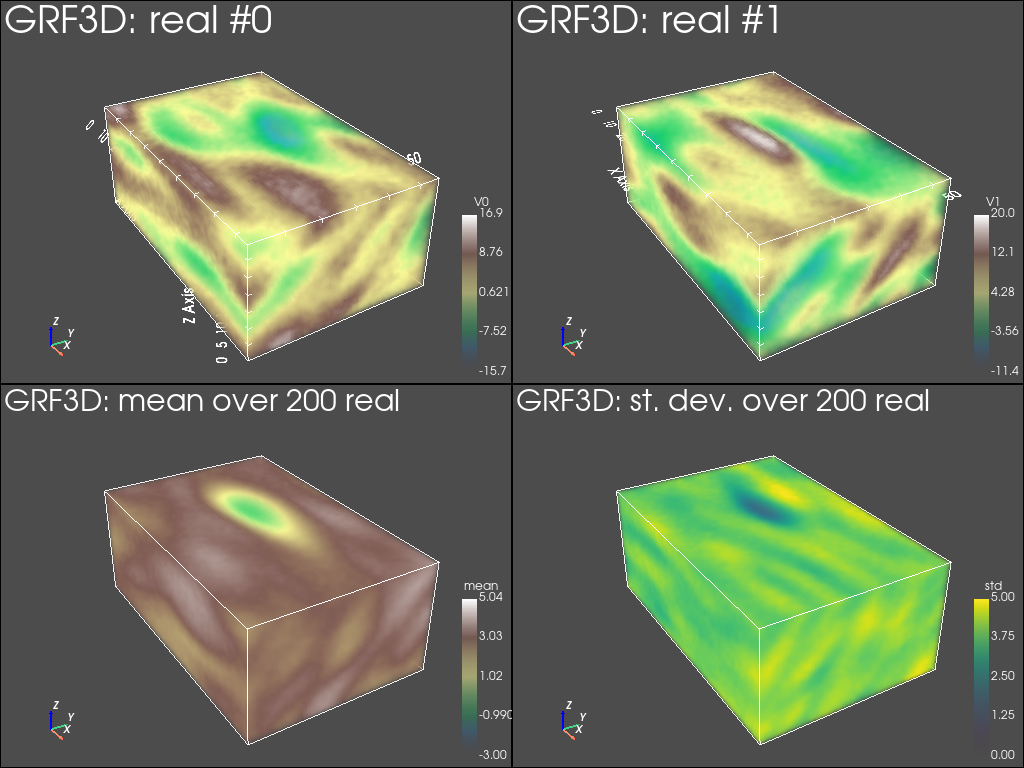

In [33]:
# Color settings
cmap = 'terrain'

# Plot "interactive in pop-up window" or "inline" (comment the undesired one) ...
# ... interactive (after closing the pop-up window, the position of the camera is retrieved in output)
#pp = pv.Plotter(shape=(2,2), notebook=False)
# ... inline
pp = pv.Plotter(shape=(2,2))

# 2 first reals
for i in (0, 1):
    pp.subplot(0, i)
    gn.imgplot3d.drawImage3D_volume(
        im3c, iv=i, 
        plotter=pp,
        cmap=cmap,
        show_bounds=True, # show axes and ticks around the 3D box
        text='GRF3D: real #{}'.format(i),
        scalar_bar_kwargs={'vertical':True, 'label_font_size':12})

# mean of all real
pp.subplot(1, 0)
gn.imgplot3d.drawImage3D_volume(
    im3c_mean, 
    plotter=pp,
    cmap=cmap,
    text='GRF3D: mean over {} real'.format(nreal),
    scalar_bar_kwargs={'vertical':True, 'label_font_size':12})

# standard deviation of all real
pp.subplot(1, 1)
gn.imgplot3d.drawImage3D_volume(
    im3c_std, 
    plotter=pp,
    cmap='viridis', 
    text='GRF3D: st. dev. over {} real'.format(nreal),
    scalar_bar_kwargs={'vertical':True, 'label_font_size':12})

pp.link_views()

pp.show(cpos=(165, -100, 115)) # position of the camera can be specified

Plot slices orthogonal to each axis x, y, z, ang going through the first data point, and plot the data points.

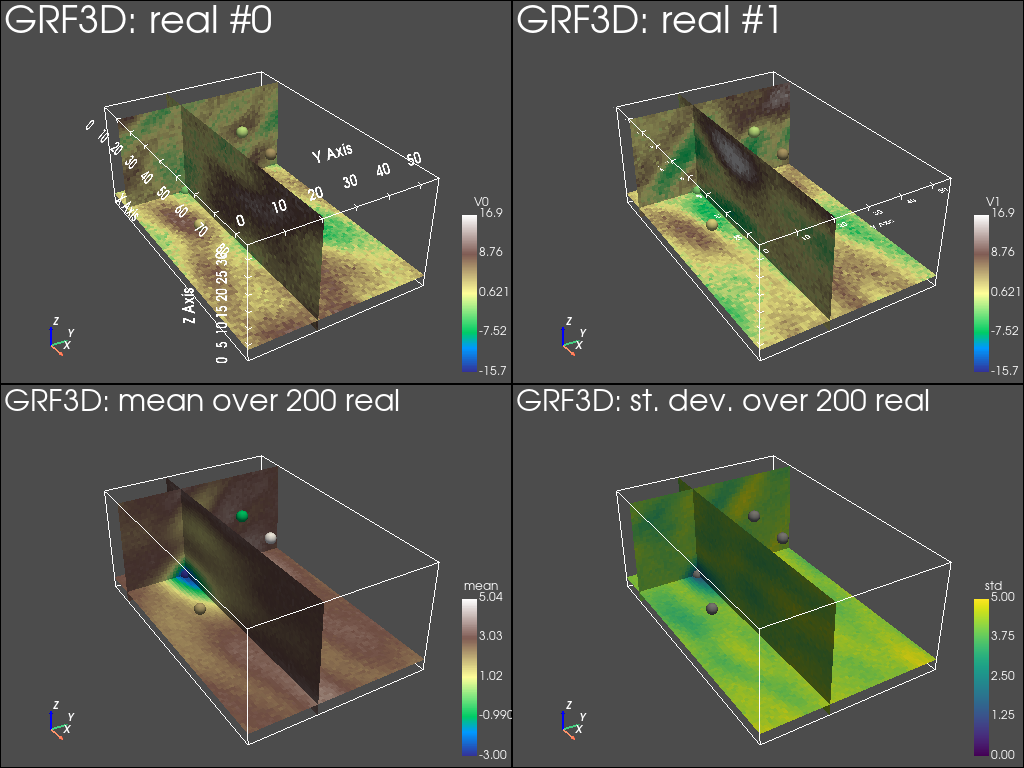

In [34]:
# Color settings
cmap = 'terrain'

cmin = np.min(im3c.vmin()[0:1]) # min value for real 0 and 1
cmax = np.max(im3c.vmax()[0:1]) # max value for real 0 and 1

cmin_mean = im3c_mean.vmin()[0] # min value for mean
cmax_mean = im3c_mean.vmax()[0] # max value for mean

# Get colors for conditioning data according to their value and color settings
data_points_col = gn.imgplot.get_colors_from_values(v, cmap=cmap, cmin=cmin, cmax=cmax) 
data_points_mean_col = gn.imgplot.get_colors_from_values(v, cmap=cmap, cmin=cmin_mean, cmax=cmax_mean) 

# Set points to be plotted
data_points = pv.PolyData(x)
data_points['colors'] = data_points_col

data_points_mean = pv.PolyData(x)
data_points_mean['colors'] = data_points_mean_col

# Plot "interactive in pop-up window" or "inline" (comment the undesired one) ...
# ... interactive (after closing the pop-up window, the position of the camera is retrieved in output)
#pp = pv.Plotter(shape=(2,2), notebook=False)
# ... inline
pp = pv.Plotter(shape=(2,2))

# 2 first reals
# data points to be added to 3D plot of real
for i in (0, 1):
    pp.subplot(0, i)
    gn.imgplot3d.drawImage3D_slice(
        im3c, iv=i, 
        plotter=pp,
        slice_normal_x=x[0,0],
        slice_normal_y=x[0,1],
        slice_normal_z=x[0,2],
        cmap=cmap, cmin=cmin, cmax=cmax, 
        show_bounds=True, # show axes and ticks around the 3D box
        text='GRF3D: real #{}'.format(i),
        scalar_bar_kwargs={'vertical':True, 'label_font_size':12})
    pp.add_mesh(data_points, rgb=True, point_size=12., render_points_as_spheres=True)

# mean of all real
pp.subplot(1, 0)
gn.imgplot3d.drawImage3D_slice(
    im3c_mean, 
    plotter=pp,
    slice_normal_x=x[0,0],
    slice_normal_y=x[0,1],
    slice_normal_z=x[0,2],
    cmap=cmap, cmin=cmin_mean, cmax=cmax_mean, 
    text='GRF3D: mean over {} real'.format(nreal),
    scalar_bar_kwargs={'vertical':True, 'label_font_size':12})
pp.add_mesh(data_points_mean, rgb=True, point_size=12., render_points_as_spheres=True)

# standard deviation of all real
pp.subplot(1, 1)
gn.imgplot3d.drawImage3D_slice(
    im3c_std, 
    plotter=pp,
    slice_normal_x=x[0,0],
    slice_normal_y=x[0,1],
    slice_normal_z=x[0,2],
    cmap='viridis', 
    text='GRF3D: st. dev. over {} real'.format(nreal),
    scalar_bar_kwargs={'vertical':True, 'label_font_size':12})
pp.add_mesh(data_points, color='gray', point_size=12., render_points_as_spheres=True)

pp.link_views()

pp.show(cpos=(165, -100, 115)) # position of the camera can be specified

In [35]:
krig3Dc, krig3Dc_std = gn.grf.krige3D(cov_model, dimension, spacing, origin, x, v, mean=3., var=2*cov_model.sill())

# Fill image with result
im3c_krig = gn.img.Img(nx, ny, nz, dx, dy, dz, ox, oy, oz, nv=2, val=np.array((krig3Dc, krig3Dc_std)))
del(krig3Dc, krig3Dc_std)

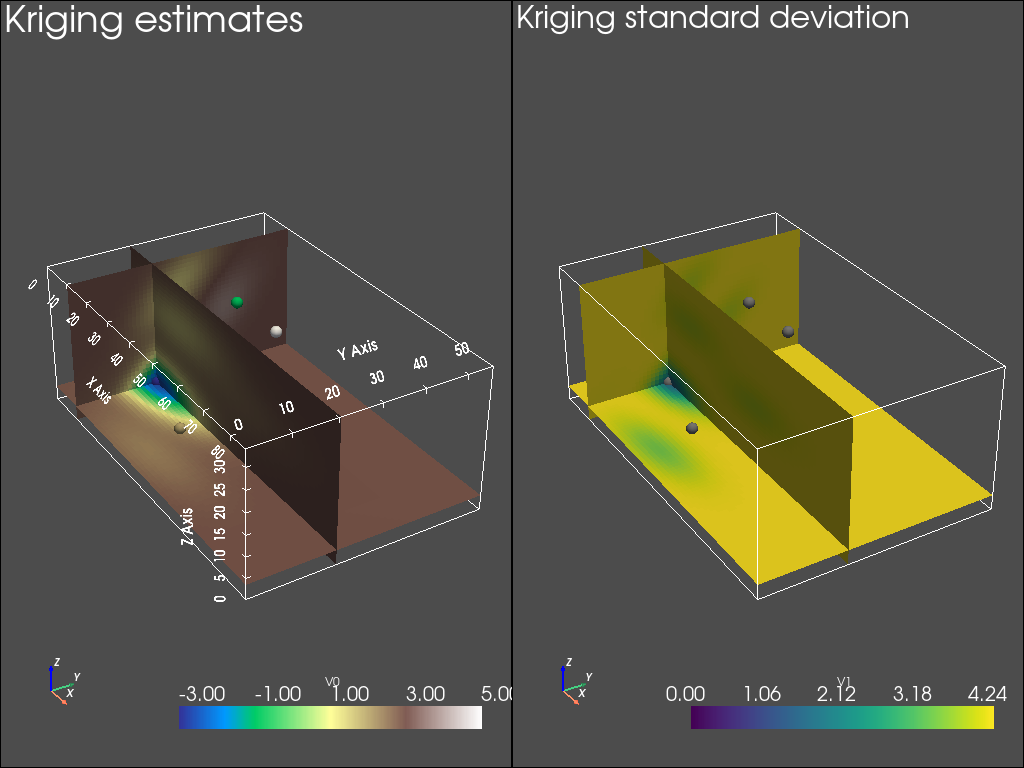

In [36]:
# Color settings
cmap = 'terrain'

cmin = im3c_krig.vmin()[0] # min value for krig. est.
cmax = im3c_krig.vmax()[0] # max value for krig. est.

# Get colors for conditioning data according to their value and color settings
data_points_krig_col = gn.imgplot.get_colors_from_values(v, cmap=cmap, cmin=cmin, cmax=cmax) 

# Set points to be plotted
data_points_krig = pv.PolyData(x)
data_points_krig['colors'] = data_points_krig_col

# Plot "interactive in pop-up window" or "inline" (comment the undesired one) ...
# ... interactive (after closing the pop-up window, the position of the camera is retrieved in output)
#pp = pv.Plotter(shape=(1,2), notebook=False)
# ... inline
pp = pv.Plotter(shape=(1,2))

# kriging estimates
pp.subplot(0, 0)
gn.imgplot3d.drawImage3D_slice(
    im3c_krig, iv=0, 
    plotter=pp,
    slice_normal_x=x[0,0],
    slice_normal_y=x[0,1],
    slice_normal_z=x[0,2],
    cmap=cmap, cmin=cmin, cmax=cmax, 
    show_bounds=True, # show axes and ticks around the 3D box
    text='Kriging estimates',
    scalar_bar_kwargs={'label_font_size':20})
pp.add_mesh(data_points_krig, rgb=True, point_size=12., render_points_as_spheres=True)


# kriging standard deviation
pp.subplot(0, 1)
gn.imgplot3d.drawImage3D_slice(
    im3c_krig, iv=1, 
    plotter=pp,
    slice_normal_x=x[0,0],
    slice_normal_y=x[0,1],
    slice_normal_z=x[0,2],
    cmap='viridis', 
    text='Kriging standard deviation',
    scalar_bar_kwargs={'label_font_size':20})
pp.add_mesh(data_points_krig, color='gray', point_size=12., render_points_as_spheres=True)

pp.link_views()

pp.show(cpos=(165, -100, 115)) # position of the camera can be specified

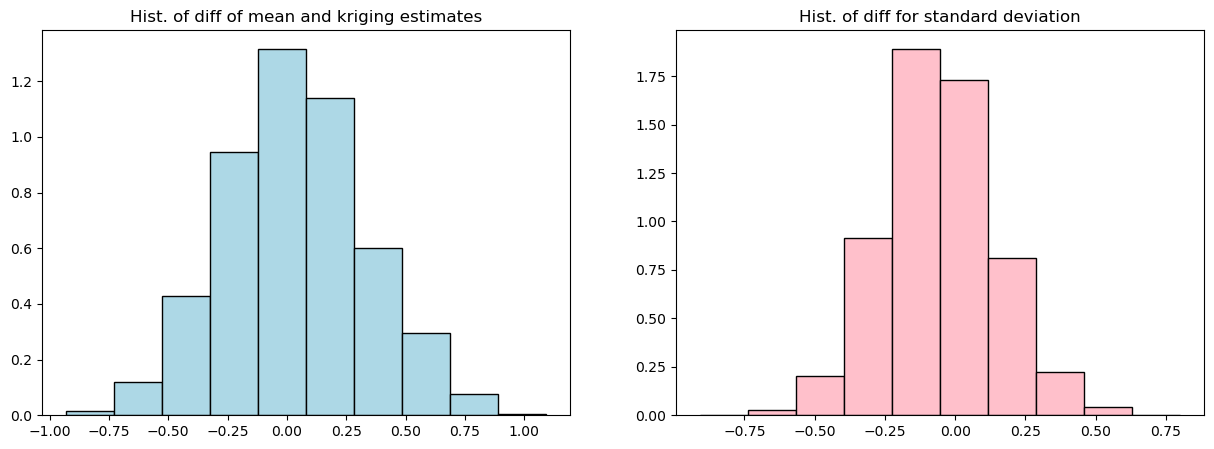

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

# Histogram of mean of all real - kriging estimates
plt.subplot(1, 2, 1)
plt.hist(im3c_mean.val.reshape(-1) - im3c_krig.val[0].reshape(-1), 
         density=True, color='lightblue', edgecolor='black')
plt.title('Hist. of diff of mean and kriging estimates')

# Histogram of std of all real - kriging std
# kriging standard deviation
plt.subplot(1, 2, 2)
plt.hist(im3c_std.val.reshape(-1) - im3c_krig.val[1].reshape(-1), 
         density=True, color='pink', edgecolor='black')
plt.title('Hist. of diff for standard deviation')

plt.show()

### Simulations with non-stationary mean and variance
Set a varying mean and a varying variance over the simulation domain.

In [38]:
# Set an image with simulation grid geometry defined above, and no variable
im = gn.img.Img(nx, ny, nz, dx, dy, dz, ox, oy, oz, nv=0)

# Get the x, y, z coordinates of the centers of grid cell (meshgrid)
xx = im.xx()
yy = im.yy()
zz = im.zz()

# Define the mean and variance on the simulation grid
mean = 0.1*(zz + yy - xx)         # define mean on the simulation grid
var = 1 + 0.1*(xx + yy + zz)      # define variance on the simulation grid

# Set variable mean and var in image im
im.append_var([mean, var], varname=['mean', 'var'])

In [39]:
%%script false --no-raise-error # skip this cell! (comment this line to run the cell)
# Or, equivalently:

# Coordinates of the center of grid cells
xg = ox + dx*(0.5+np.arange(nx))
yg = oy + dy*(0.5+np.arange(ny))
zg = oz + dz*(0.5+np.arange(nz))

# Create a meshgrid from the center of grid cells
zz, yy, xx = np.meshgrid(zg, yg, xg, indexing='ij')

# Define the mean and variance on the simulation grid
mean = 0.1*(zz + yy - xx)         # define mean on the simulation grid
var = 1 + 0.1*(xx + yy + zz)      # define variance on the simulation grid

# Fill image for display
im = gn.img.Img(nx, ny, nz, dx, dy, dz, ox, oy, oz, nv=2, val=np.array((mean, var)))

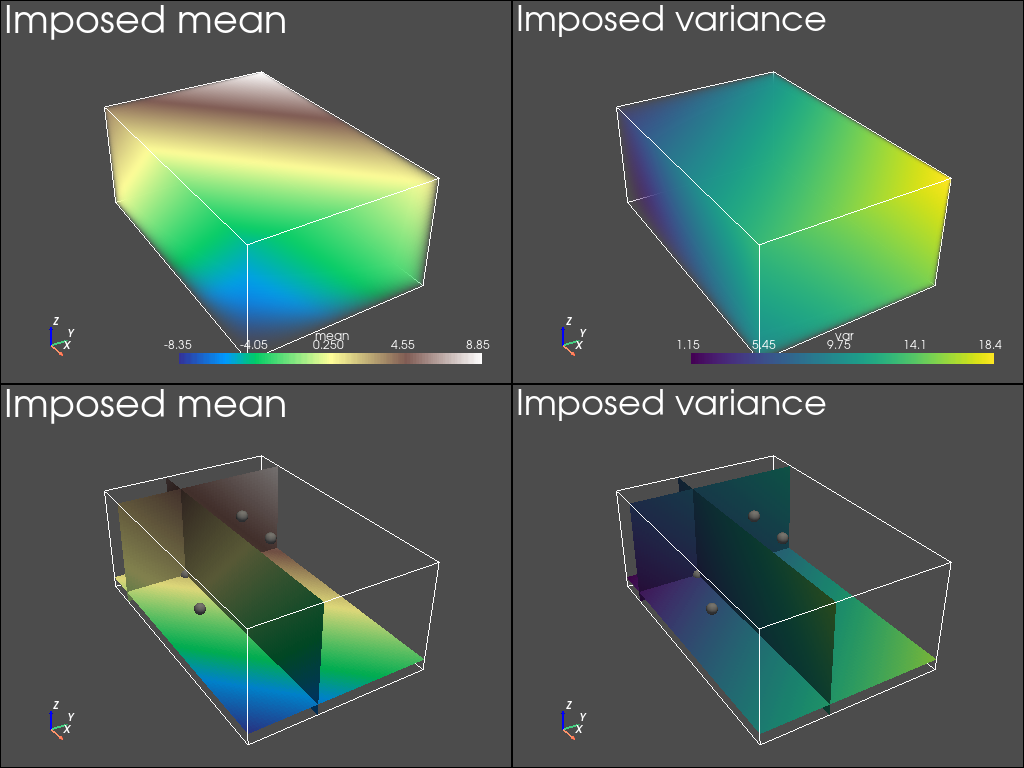

In [40]:
# Color settings
cmap = 'terrain'

# Plot "interactive in pop-up window" or "inline" (comment the undesired one) ...
# ... interactive (after closing the pop-up window, the position of the camera is retrieved in output)
#pp = pv.Plotter(shape=(2,2), notebook=False)
# ... inline
pp = pv.Plotter(shape=(2,2))

# data points to be added to plot
data_points = pv.PolyData(x)

# mean (3d)
pp.subplot(0, 0)
gn.imgplot3d.drawImage3D_volume(
    im, iv=0, 
    plotter=pp,
    cmap=cmap, 
    text='Imposed mean',
    scalar_bar_kwargs={'label_font_size':12})

# var
pp.subplot(0, 1)
gn.imgplot3d.drawImage3D_volume(
    im, iv=1, 
    plotter=pp,
    cmap='viridis', 
    text='Imposed variance',
    scalar_bar_kwargs={'label_font_size':12})

# mean
pp.subplot(1, 0)
gn.imgplot3d.drawImage3D_slice(
    im, iv=0, 
    plotter=pp,
    slice_normal_x=x[0,0],
    slice_normal_y=x[0,1],
    slice_normal_z=x[0,2],
    cmap=cmap,
    text='Imposed mean',
    scalar_bar_kwargs={'label_font_size':12})
pp.add_mesh(data_points, color='gray', point_size=12., render_points_as_spheres=True)


# var
pp.subplot(1, 1)
gn.imgplot3d.drawImage3D_slice(
    im, iv=1, 
    plotter=pp,
    slice_normal_x=x[0,0],
    slice_normal_y=x[0,1],
    slice_normal_z=x[0,2],
    cmap='viridis', 
    text='Imposed variance',
    scalar_bar_kwargs={'label_font_size':12})
pp.add_mesh(data_points, color='gray', point_size=12., render_points_as_spheres=True)

pp.link_views()

pp.show(cpos=(165, -100, 115)) # position of the camera can be specified

In [41]:
nreal = 200
np.random.seed(123)
sim3Dd = gn.grf.grf3D(cov_model, dimension, spacing, origin, x=x, v=v, 
                      mean=mean, var=var, nreal=nreal)

# Fill image with result, and compute statistics
im3d = gn.img.Img(nx, ny, nz, dx, dy, dz, ox, oy, oz, nv=nreal, val=sim3Dd)
del(sim3Dd)
im3d_mean = gn.img.imageContStat(im3d, op='mean') # pixel-wise mean
im3d_std = gn.img.imageContStat(im3d, op='std')   # pixel-wise standard deviation

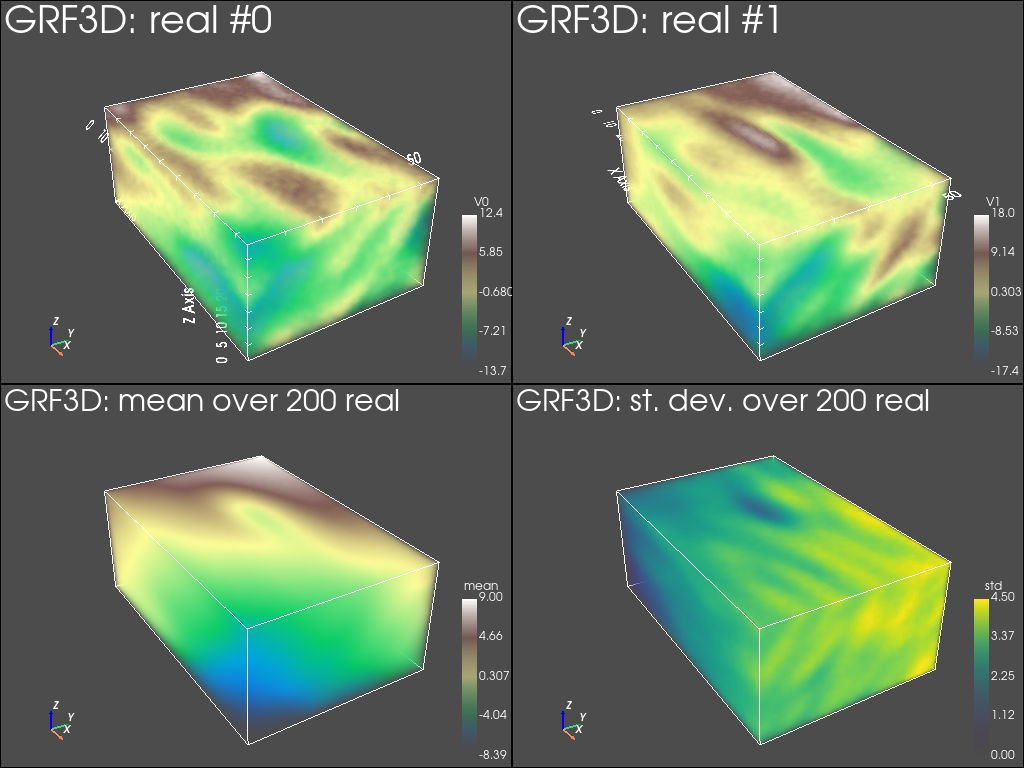

In [42]:
# Color settings
cmap = 'terrain'

# Plot "interactive in pop-up window" or "inline" (comment the undesired one) ...
# ... interactive (after closing the pop-up window, the position of the camera is retrieved in output)
#pp = pv.Plotter(shape=(2,2), notebook=False)
# ... inline
pp = pv.Plotter(shape=(2,2))

# 2 first reals
for i in (0, 1):
    pp.subplot(0, i)
    gn.imgplot3d.drawImage3D_volume(
        im3d, iv=i, 
        plotter=pp,
        cmap=cmap,
        show_bounds=True, # show axes and ticks around the 3D box
        text='GRF3D: real #{}'.format(i),
        scalar_bar_kwargs={'vertical':True, 'label_font_size':12})

# mean of all real
pp.subplot(1, 0)
gn.imgplot3d.drawImage3D_volume(
    im3d_mean, 
    plotter=pp,
    cmap=cmap,
    text='GRF3D: mean over {} real'.format(nreal),
    scalar_bar_kwargs={'vertical':True, 'label_font_size':12})

# standard deviation of all real
pp.subplot(1, 1)
gn.imgplot3d.drawImage3D_volume(
    im3d_std, 
    plotter=pp,
    cmap='viridis', 
    text='GRF3D: st. dev. over {} real'.format(nreal),
    scalar_bar_kwargs={'vertical':True, 'label_font_size':12})

pp.link_views()

pp.show(cpos=(165, -100, 115)) # position of the camera can be specified

Plot slices orthogonal to each axis x, y, z, ang going through the first data point, and plot the data points.

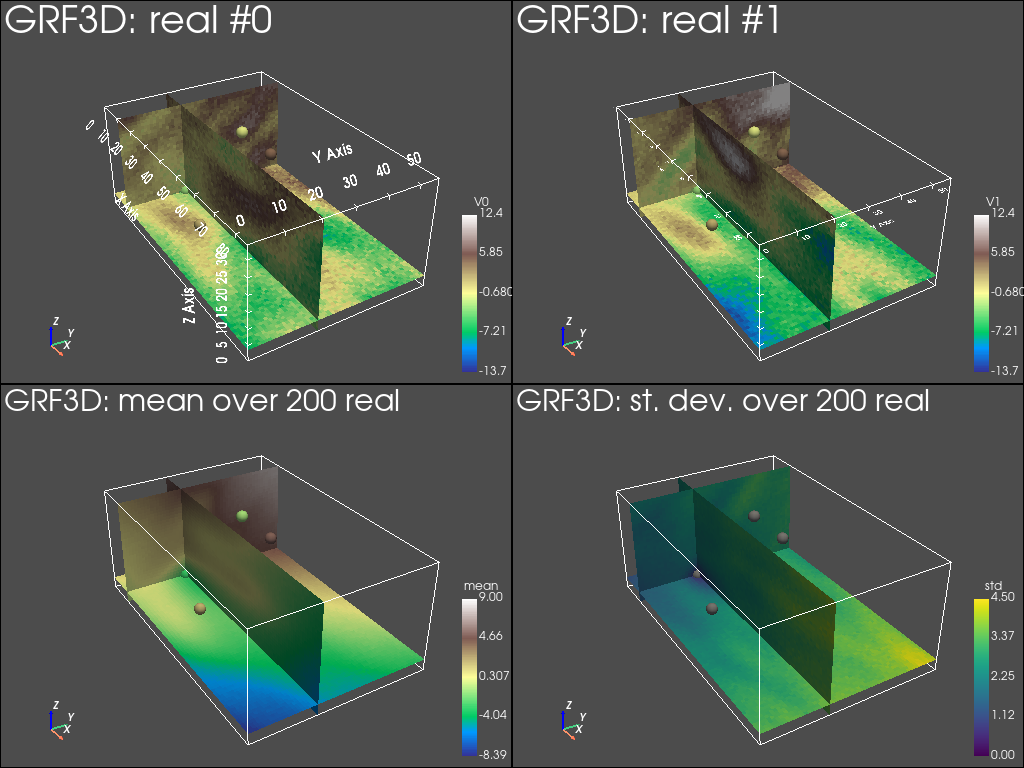

In [43]:
# Color settings
cmap = 'terrain'

cmin = np.min(im3d.vmin()[0:1]) # min value for real 0 and 1
cmax = np.max(im3d.vmax()[0:1]) # max value for real 0 and 1

cmin_mean = im3d_mean.vmin()[0] # min value for mean
cmax_mean = im3d_mean.vmax()[0] # max value for mean

# Get colors for conditioning data according to their value and color settings
data_points_col = gn.imgplot.get_colors_from_values(v, cmap=cmap, cmin=cmin, cmax=cmax) 
data_points_mean_col = gn.imgplot.get_colors_from_values(v, cmap=cmap, cmin=cmin_mean, cmax=cmax_mean) 

# Set points to be plotted
data_points = pv.PolyData(x)
data_points['colors'] = data_points_col

data_points_mean = pv.PolyData(x)
data_points_mean['colors'] = data_points_mean_col

# Plot "interactive in pop-up window" or "inline" (comment the undesired one) ...
# ... interactive (after closing the pop-up window, the position of the camera is retrieved in output)
#pp = pv.Plotter(shape=(2,2), notebook=False)
# ... inline
pp = pv.Plotter(shape=(2,2))

# 2 first reals
# data points to be added to 3D plot of real
for i in (0, 1):
    pp.subplot(0, i)
    gn.imgplot3d.drawImage3D_slice(
        im3d, iv=i, 
        plotter=pp,
        slice_normal_x=x[0,0],
        slice_normal_y=x[0,1],
        slice_normal_z=x[0,2],
        cmap=cmap, cmin=cmin, cmax=cmax, 
        show_bounds=True, # show axes and ticks around the 3D box
        text='GRF3D: real #{}'.format(i),
        scalar_bar_kwargs={'vertical':True, 'label_font_size':12})
    pp.add_mesh(data_points, rgb=True, point_size=12., render_points_as_spheres=True)

# mean of all real
pp.subplot(1, 0)
gn.imgplot3d.drawImage3D_slice(
    im3d_mean, 
    plotter=pp,
    slice_normal_x=x[0,0],
    slice_normal_y=x[0,1],
    slice_normal_z=x[0,2],
    cmap=cmap, cmin=cmin_mean, cmax=cmax_mean, 
    text='GRF3D: mean over {} real'.format(nreal),
    scalar_bar_kwargs={'vertical':True, 'label_font_size':12})
pp.add_mesh(data_points_mean, rgb=True, point_size=12., render_points_as_spheres=True)

# standard deviation of all real
pp.subplot(1, 1)
gn.imgplot3d.drawImage3D_slice(
    im3d_std, 
    plotter=pp,
    slice_normal_x=x[0,0],
    slice_normal_y=x[0,1],
    slice_normal_z=x[0,2],
    cmap='viridis', 
    text='GRF3D: st. dev. over {} real'.format(nreal),
    scalar_bar_kwargs={'vertical':True, 'label_font_size':12})
pp.add_mesh(data_points, color='gray', point_size=12., render_points_as_spheres=True)

pp.link_views()

pp.show(cpos=(165, -100, 115)) # position of the camera can be specified

In [44]:
krig3Dd, krig3Dd_std = gn.grf.krige3D(cov_model, dimension, spacing, origin, x, v, mean=mean, var=var)

# Fill image with result
im3d_krig = gn.img.Img(nx, ny, nz, dx, dy, dz, ox, oy, oz, nv=2, val=np.array((krig3Dd, krig3Dd_std)))
del(krig3Dd, krig3Dd_std)

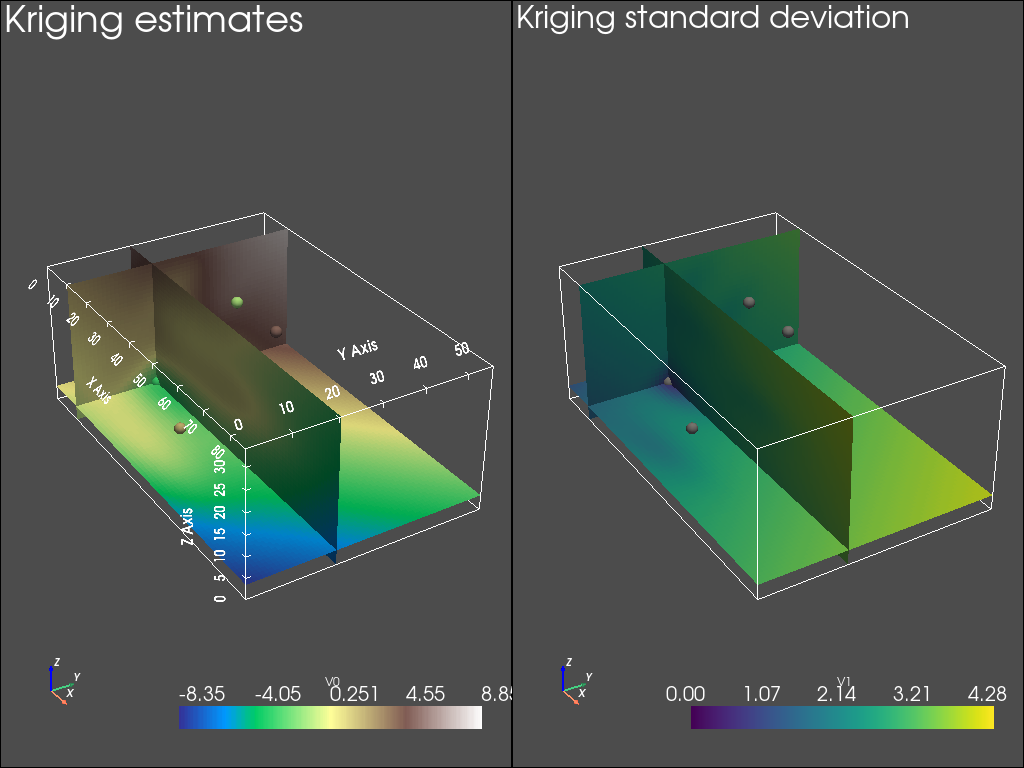

In [45]:
# Color settings
cmap = 'terrain'

cmin = im3d_krig.vmin()[0] # min value for krig. est.
cmax = im3d_krig.vmax()[0] # max value for krig. est.

# Get colors for conditioning data according to their value and color settings
data_points_krig_col = gn.imgplot.get_colors_from_values(v, cmap=cmap, cmin=cmin, cmax=cmax) 

# Set points to be plotted
data_points_krig = pv.PolyData(x)
data_points_krig['colors'] = data_points_krig_col

# Plot "interactive in pop-up window" or "inline" (comment the undesired one) ...
# ... interactive (after closing the pop-up window, the position of the camera is retrieved in output)
#pp = pv.Plotter(shape=(1,2), notebook=False)
# ... inline
pp = pv.Plotter(shape=(1,2))

# kriging estimates
pp.subplot(0, 0)
gn.imgplot3d.drawImage3D_slice(
    im3d_krig, iv=0, 
    plotter=pp,
    slice_normal_x=x[0,0],
    slice_normal_y=x[0,1],
    slice_normal_z=x[0,2],
    cmap=cmap, cmin=cmin, cmax=cmax, 
    show_bounds=True, # show axes and ticks around the 3D box
    text='Kriging estimates',
    scalar_bar_kwargs={'label_font_size':20})
pp.add_mesh(data_points_krig, rgb=True, point_size=12., render_points_as_spheres=True)


# kriging standard deviation
pp.subplot(0, 1)
gn.imgplot3d.drawImage3D_slice(
    im3d_krig, iv=1, 
    plotter=pp,
    slice_normal_x=x[0,0],
    slice_normal_y=x[0,1],
    slice_normal_z=x[0,2],
    cmap='viridis', 
    text='Kriging standard deviation',
    scalar_bar_kwargs={'label_font_size':20})
pp.add_mesh(data_points_krig, color='gray', point_size=12., render_points_as_spheres=True)

pp.link_views()

pp.show(cpos=(165, -100, 115)) # position of the camera can be specified

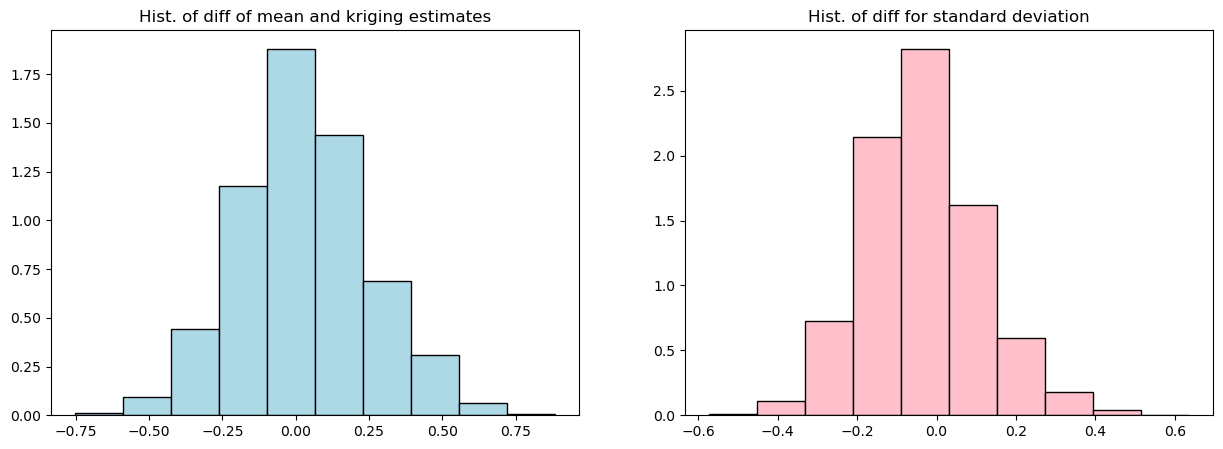

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

# Histogram of mean of all real - kriging estimates
plt.subplot(1, 2, 1)
plt.hist(im3d_mean.val.reshape(-1) - im3d_krig.val[0].reshape(-1), 
         density=True, color='lightblue', edgecolor='black')
plt.title('Hist. of diff of mean and kriging estimates')

# Histogram of std of all real - kriging std
# kriging standard deviation
plt.subplot(1, 2, 2)
plt.hist(im3d_std.val.reshape(-1) - im3d_krig.val[1].reshape(-1), 
         density=True, color='pink', edgecolor='black')
plt.title('Hist. of diff for standard deviation')

plt.show()